In [24]:
!git clone https://github.com/khalil-research/PyEPO.git

fatal: destination path 'PyEPO' already exists and is not an empty directory.


In [25]:
!pip install PyEPO/pkg/.

ERROR: Invalid requirement: 'PyEPO/pkg/.'
Hint: It looks like a path. File 'PyEPO/pkg/.' does not exist.


In [3]:
!pip install Auto-Sklearn

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
  Using cached auto_sklearn-0.15.0-py3-none-any.whl
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/8c/1d/d7eff5e51ee6d054011323a16eb2b360a731c2026d3cff757e48aee8f950/pyrfr-0.8.3.tar.gz (293 kB)
  Preparing metadata (setup.py) ... done
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/ab/c2/62b6216a8cda702f859a38ac7eb0394c665420b7670e1638d7f8d595931e/ConfigSpace-0.4.21-cp39-cp39-macosx_10_9_x86_64.whl (882 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/c6/6a/41fe5034d4f85c24aea9b7dca1f070bcca2ec29251d0624e87436bf5a2c0/scikit_learn-0.24.2-cp39-cp39-macosx_10_13_x86_64.whl (7.3 MB)
  Using cached pynisher-0.6.4-py3-none-any.whl
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/f4/2c/c90a3adaf0ddb70afe193f5ebfb539612af57cffe677c3126be533df3098/distro-1.8.0-py3-none-any.whl (20 kB)
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/d3/52/2ffaf33d2d34494b09106d52b3429d8dd198a9c29c73a

In [8]:
import os
print(os.getcwd())


/Users/qianraquel/A PyEPO_ipynb


In [10]:
import sys
print(sys.executable)


/Users/qianraquel/opt/anaconda3/envs/gurobi_env/bin/python


In [14]:
!{sys.executable} -m pip install pyomo

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 1.3 MB/s eta 0:00:00a 0:00:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.0 MB/s eta 0:00:00


### gurobi.version

In [7]:
import gurobipy as gp
print(gp.gurobi.version())


(10, 0, 1)


In [23]:
import sys
print(sys.version)


3.8.0 (default, Nov  6 2019, 15:49:01) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [8]:
import torch

# Warcraft Shortest Path

In [1]:
# set work dir
import os
os.chdir("/Users/qianraquel/A PyEPO_ipynb/PyEPO/pkg")

In [2]:
import time
import random
import pyepo
import torch
from torch import nn
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm
# fix random seed
random.seed(135)
np.random.seed(135)
torch.manual_seed(135)

Auto-Sklearn cannot be imported.


In [3]:
# map size
k = 12
# k = 18

In [4]:
tmaps_train = np.load("./data/train_maps.npy".format(k,k))
tmaps_val = np.load("./data/val_maps.npy".format(k,k))
tmaps_test = np.load("./data/test_maps.npy".format(k,k))

## maps

In [6]:
tmaps_train.shape

(10000, 96, 96, 3)

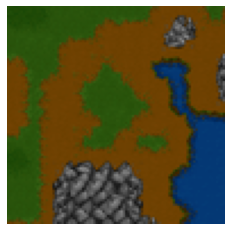

In [8]:
plt.axis("off")
plt.imshow(tmaps_train[0])
plt.show()

## costs

In [7]:
costs_train = np.load("./data/train_vertex_weights.npy".format(k,k))
costs_val = np.load("./data/val_vertex_weights.npy".format(k,k))
costs_test = np.load("./data/test_vertex_weights.npy".format(k,k))

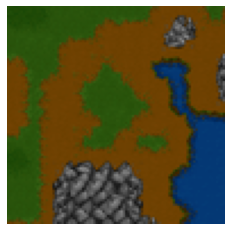

array([[0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 0.8],
       [0.8, 0.8, 0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 9.2, 1.2, 1.2],
       [0.8, 0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2],
       [1.2, 0.8, 0.8, 1.2, 1.2, 0.8, 1.2, 1.2, 7.7, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 1.2, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 0.8, 0.8, 0.8, 0.8, 1.2, 7.7, 1.2, 1.2],
       [1.2, 0.8, 1.2, 1.2, 1.2, 0.8, 0.8, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 0.8, 0.8, 1.2, 0.8, 0.8, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 7.7, 7.7, 7.7],
       [0.8, 0.8, 1.2, 9.2, 9.2, 9.2, 9.2, 1.2, 1.2, 1.2, 7.7, 7.7]],
      dtype=float16)

In [8]:
i = 0
plt.axis("off")
plt.imshow(tmaps_train[i])
plt.show()
costs_train[i]

In [9]:
import numpy as np

print("Min Value:", np.min(costs_train[i]))
print("Max Value:", np.max(costs_train[i]))


Min Value: 0.8
Max Value: 9.2


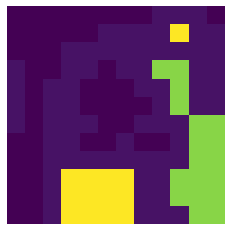

In [11]:
plt.axis("off")
plt.imshow(costs_train[0])
plt.show()

## shortest Paths

In [10]:
paths_train = np.load("./data/train_shortest_paths.npy".format(k,k))
paths_val = np.load("./data/val_shortest_paths.npy".format(k,k))
paths_test = np.load("./data/test_shortest_paths.npy".format(k,k))

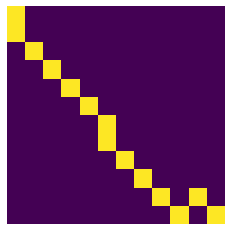

In [11]:
plt.axis("off")
plt.imshow(paths_train[0])
plt.show()

# 2 Data Loader

In [12]:
from torch.utils.data import Dataset
class mapDataset(Dataset):
    def __init__(self, tmaps, costs, paths):
        self.tmaps = tmaps
        self.costs = costs
        self.paths = paths
        self.objs = (costs * paths).sum(axis=(1,2)).reshape(-1,1)
        
    def __len__(self):
        return len(self.costs)
    
    def __getitem__(self, ind):
        return (
            torch.FloatTensor(self.tmaps[ind].transpose(2, 0, 1)/255).detach(), # image
            torch.FloatTensor(self.costs[ind]).reshape(-1),
            torch.FloatTensor(self.paths[ind]).reshape(-1),
            torch.FloatTensor(self.objs[ind]),
        )

In [13]:
# datasets
dataset_train = mapDataset(tmaps_train, costs_train, paths_train)
dataset_val = mapDataset(tmaps_val, costs_val, paths_val)
dataset_test = mapDataset(tmaps_test, costs_test, paths_test)
# dataloader
from torch.utils.data import DataLoader
batch_size = 70
loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
loader_val = DataLoader(dataset_val, batch_size=batch_size, shuffle=False)
loader_test = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

# 3 Neural Network: Truncated Resnet18

In [14]:
from torchvision.models import resnet18
nnet = resnet18(pretrained=False)
print(nnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/Users/qianraquel/opt/anaconda3/envs/gurobi_env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/qianraquel/opt/anaconda3/envs/gurobi_env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [15]:
# build new ResNet18 with Max Pooling
class partialResNet(nn.Module):
    
    def __init__(self, k):
        super(partialResNet, self).__init__()
        # init resnet 18
        resnet = resnet18(pretrained=False)
        # first five layers of ResNet18
        self.conv1 = resnet.conv1
        self.bn = resnet.bn1
        self.relu = resnet.relu
        self.maxpool1 = resnet.maxpool
        self.block = resnet.layer1
        # conv to 1 channel
        self.conv2  = nn.Conv2d(64, 1, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1), bias=False)
        # max pooling
        self.maxpool2 = nn.AdaptiveMaxPool2d((k,k))
        
    def forward(self, x):
        h = self.conv1(x)
        h = self.bn(h)
        h = self.relu(h)
        h = self.maxpool1(h)
        h = self.block(h)
        h = self.conv2(h)
        out = self.maxpool2(h)
        # reshape for optmodel
        out = torch.squeeze(out, 1)
        out = out.reshape(out.shape[0], -1)
        return out

In [16]:
# Initialize the model
k=12
model = partialResNet(k)

# Assume that you're using the training loader to get the data
for i, data in enumerate(loader_train, 0):
    input_data, _, _, _ = data
    
    # Use the model to get the output
    output = model(input_data)

    # Convert the output data to numpy arrays
    output_data = output.data.cpu().numpy()

    # Print the minimum and maximum of the output
    print("Batch", i, "Output range: ", output_data.min(), " to ", output_data.max())


[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.


Batch 0 Output range:  -1.0223027  to  2.13387
Batch 1 Output range:  -1.3781141  to  2.2071643
Batch 2 Output range:  -1.0362805  to  2.3401423
Batch 3 Output range:  -1.0897328  to  2.0841982
Batch 4 Output range:  -1.540965  to  1.9128793
Batch 5 Output range:  -1.2985353  to  2.1267004
Batch 6 Output range:  -1.2817655  to  1.9235705
Batch 7 Output range:  -1.1004095  to  2.0882916
Batch 8 Output range:  -1.0135428  to  2.1823812
Batch 9 Output range:  -1.2262682  to  2.036108
Batch 10 Output range:  -1.0711814  to  2.173751
Batch 11 Output range:  -1.1165206  to  2.052712
Batch 12 Output range:  -1.4997988  to  2.515087
Batch 13 Output range:  -1.2895727  to  2.2381988
Batch 14 Output range:  -1.2359344  to  2.124395
Batch 15 Output range:  -1.0091822  to  2.096461
Batch 16 Output range:  -1.2082789  to  2.0395212
Batch 17 Output range:  -1.2267989  to  2.1577764
Batch 18 Output range:  -1.283542  to  2.374349
Batch 19 Output range:  -1.1679904  to  2.3268995
Batch 20 Output range

KeyboardInterrupt: 

# 4 Optimization Model: Linear Programming

In [18]:
import gurobipy as gp
GLOBAL_VAR = gp.Env()


Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-18


In [19]:
import gurobipy as gp
from gurobipy import GRB

from pyepo.model.grb.grbmodel import optGrbModel

class shortestPathModel(optGrbModel):
    """
    This class is optimization model for shortest path problem on 2D grid with 8 neighbors

    Attributes:
        _model (GurobiPy model): Gurobi model
        grid (tuple of int): Size of grid network
        nodes (list): list of vertex
        edges (list): List of arcs
        nodes_map (ndarray): 2D array for node index
    """

    def __init__(self, grid):
        """
        Args:
            grid (tuple of int): size of grid network
        """
        self.grid = grid
        self.nodes, self.edges, self.nodes_map = self._getEdges()
        super().__init__()

    def _getEdges(self):
        """
        A method to get list of edges for grid network

        Returns:
            list: arcs
        """
        # init list
        nodes, edges = [], []
        # init map from coord to ind
        nodes_map = {}
        for i in range(self.grid[0]):
            for j in range(self.grid[1]):
                u = self._calNode(i, j)
                nodes_map[u] = (i,j)
                nodes.append(u)
                # edge to 8 neighbors
                # up
                if i != 0:
                    v = self._calNode(i-1, j)
                    edges.append((u,v))
                    # up-right
                    if j != self.grid[1] - 1:
                        v = self._calNode(i-1, j+1)
                        edges.append((u,v))
                # right
                if j != self.grid[1] - 1:
                    v = self._calNode(i, j+1)
                    edges.append((u,v))
                    # down-right
                    if i != self.grid[0] - 1:
                        v = self._calNode(i+1, j+1)
                        edges.append((u,v))
                # down
                if i != self.grid[0] - 1:
                    v = self._calNode(i+1, j)
                    edges.append((u,v))
                    # down-left
                    if j != 0:
                        v = self._calNode(i+1, j-1)
                        edges.append((u,v))
                # left
                if j != 0:
                    v = self._calNode(i, j-1)
                    edges.append((u,v))
                    # top-left
                    if i != 0:
                        v = self._calNode(i-1, j-1)
                        edges.append((u,v))
        return nodes, edges, nodes_map
    
    def _calNode(self, x, y):
        """
        A method to calculate index of node
        """
        v = x * self.grid[1] + y
        return v

    def _getModel(self):
        """
        Returns:
            tuple: optimization model and variables
        """
        global GLOBAL_VAR
        # ceate a model
        m = gp.Model("shortest path",GLOBAL_VAR)
        # varibles
        x = m.addVars(self.edges, ub=1, name="x")
        # sense
        m.modelSense = GRB.MINIMIZE
        # constraints
        for i in range(self.grid[0]):
            for j in range(self.grid[1]):
                v = self._calNode(i, j)
                expr = 0
                for e in self.edges:
                    # flow in
                    if v == e[1]:
                        expr += x[e]
                    # flow out
                    elif v == e[0]:
                        expr -= x[e]
                # source
                if i == 0 and j == 0:
                    m.addConstr(expr == -1)
                # sink
                elif i == self.grid[0] - 1 and j == self.grid[0] - 1:
                    m.addConstr(expr == 1)
                # transition
                else:
                    m.addConstr(expr == 0)
        return m, x
    
    def setObj(self, c):
        # vector to matrix
        c = c.reshape(self.grid)
        # sum up vector cost 
        obj = c[0,0] + gp.quicksum(c[self.nodes_map[j]] * self.x[i,j] for i, j in self.x)
        self._model.setObjective(obj)
        
    def solve(self):
        """
        Returns:
            tuple: optimal solution (list) and objective value (float)
        """
        # update gurobi model
        self._model.update()
        # solve
        self._model.optimize()
        
        # kxk solution map
        sol = np.zeros(self.grid)
        for i, j in self.edges:
            # active edge
            if abs(1 - self.x[i,j].x) < 1e-3:
                # node on active edge
                sol[self.nodes_map[i]] = 1
                sol[self.nodes_map[j]] = 1
        # matrix to vector
        sol = sol.reshape(-1)
        return sol, self._model.objVal

In [22]:
# init model
grid = (k, k)
optmodel = shortestPathModel(grid)

Obj: 26.998046875
Path:


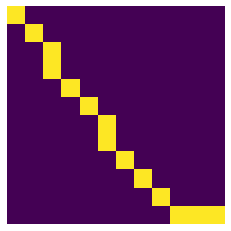

In [23]:
# test
optmodel.setObj(costs_train[0]) # assign cost
sol, obj = optmodel.solve() # solve
print("Obj: {}".format(obj))
print("Path:")
plt.axis("off")
plt.imshow(sol.reshape(k,k))
plt.show()

# 5 Useful Functions

In [24]:
class earlyStopper:
    """
    Early stopping for training
    """
    def __init__(self, patience=3):
        self.patience = patience
        self.counter = 0
        self.min_regret = np.inf

    def stop(self, regret):
        if regret + 1e-5 < self.min_regret:
            self.min_regret = regret
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [25]:
import numpy as np
import torch
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0.0, path='checkpoint.pth', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score > self.best_score + self.delta:#for regret, the smaller the better
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation regret decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [26]:
def evaluate(nnet, optmodel, dataloader):
    # init data
    data = {"Regret":[], "Relative Regret":[], "Accuracy":[], "Optimal":[]}
    # eval
    nnet.eval()
    for x, c, w, z in tqdm(dataloader):
        # cuda
        if next(nnet.parameters()).is_cuda:
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # predict
        cp = nnet(x)
        # to numpy
        c = c.to("cpu").detach().numpy()
        w = w.to("cpu").detach().numpy()
        z = z.to("cpu").detach().numpy()
        cp = cp.to("cpu").detach().numpy()
        # solve
        for i in range(cp.shape[0]):
            # sol for pred cost
            optmodel.setObj(cp[i])
            wpi, _ = optmodel.solve()
            # obj with true cost
            zpi = np.dot(wpi, c[i])
            # round
            zpi = zpi.round(1)
            zi = z[i,0].round(1)
            # regret
            regret = (zpi - zi).round(1)
            data["Regret"].append(regret)
            data["Relative Regret"].append(regret / zi)
            # accuracy
            data["Accuracy"].append((abs(wpi - w[i]) < 0.5).mean())
            # optimal
            data["Optimal"].append(abs(regret) < 1e-5)
    # dataframe
    df = pd.DataFrame.from_dict(data)
    # print
    time.sleep(1)
    print("Avg Regret: {:.4f}".format(df["Regret"].mean()))
    print("Avg Rel Regret: {:.2f}%".format(df["Relative Regret"].mean()*100))
    print("Path Accuracy: {:.2f}%".format(df["Accuracy"].mean()*100))
    print("Optimality Ratio: {:.2f}%".format(df["Optimal"].mean()*100))
    return df

In [27]:
def plotLearningCurve(loss_log, regret_log):
    # draw loss during training
    plt.figure(figsize=(8, 4))
    plt.plot(loss_log, color="c")
    plt.xticks(fontsize=10)
    #yticks = [0.5,1,5]
    plt.yticks(fontsize=10)
    plt.xlim(-epoch/50, epochs+epoch/50)
    plt.ylim(0, max(loss_log[:])*1.1)
    #plt.ylim(0,5)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Loss", fontsize=12)
    plt.title("Learning Curve on Training Set", fontsize=12)
    plt.show()
    # draw normalized regret on test
    plt.figure(figsize=(8, 4))
    plt.plot([i*log_step for i in range(len(regret_log))], regret_log, color="royalblue")
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(-epoch/50, epochs+epoch/50)
    plt.ylim(0, max(regret_log[1:])*1.1)
    plt.xlabel("Epochs", fontsize=12)
    plt.ylabel("Normalized Regret", fontsize=12)
    plt.title("Learning Curve on Validation Set", fontsize=12)
    plt.show()

# 6 Training

In [28]:
# number of epochs
epochs = 50
# learning rate
lr = 5e-4
# log step
log_step = 1

In [29]:
# init net
nnet = partialResNet(k=12)#k is equal to map size
# cuda
if torch.cuda.is_available():
    nnet = nnet.cuda()
# set optimizer
optimizer = torch.optim.Adam(nnet.parameters(), lr=lr)

In [30]:
# set loss
mseloss = nn.MSELoss()

In [32]:
# set stopper
#stopper = earlyStopper(patience=7)
early_stopping = EarlyStopping(patience=7, verbose=True,path='./model_weights/TS0424.pth')
# train
loss_log1, regret_log1 = [], [pyepo.metric.regret(nnet, optmodel, loader_val)]
tbar = tqdm(range(epochs))
for epoch in tbar:
    nnet.train()
    train_loss=0
    batch_idx=0
    for x, c, w, z in loader_train:
        # cuda
        if torch.cuda.is_available():
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # forward pass
        cp = nnet(x) # predicted cost
        loss = mseloss(cp, c) # loss
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # log       
        train_loss += loss.item()
        batch_idx+=1
    loss_log1.append(train_loss/batch_idx)
    tbar.set_description("Epoch: {:2}, Loss: {:3.4f}".format(epoch, train_loss/batch_idx))
    # scheduled learning rate
    if (epoch == int(epochs*0.6)) or (epoch == int(epochs*0.8)):
        for g in optimizer.param_groups:
            g['lr'] /= 10
    if epoch % log_step == 0:
        # log regret
        regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        regret_log1.append(regret)
        # early stop
        #regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        early_stopping(regret,nnet)  
        if early_stopping.early_stop:
        #print("Early stopping")
          break
        #if stopper.stop(regret):
            #break

[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
Epoch:  0, Loss: 2.1622:   2%|▎               | 1/50 [03:12<2:37:07, 192.39s/it]

Validation regret decreased (inf --> 0.033201).  Saving model ...


Epoch:  1, Loss: 0.8138:   4%|▋               | 2/50 [06:35<2:38:45, 198.45s/it]

Validation regret decreased (0.033201 --> 0.022565).  Saving model ...


Epoch:  1, Loss: 0.8138:   4%|▋               | 2/50 [06:59<2:47:44, 209.69s/it]

KeyboardInterrupt



In [35]:
from tqdm import tqdm

# set stopper
early_stopping = EarlyStopping(patience=7, verbose=True, path='./model_weights/TS0424.pth')
# train
loss_log1, regret_log1 = [], [pyepo.metric.regret(nnet, optmodel, loader_val)]
tbar = tqdm(range(epochs))
for epoch in tbar:
    nnet.train()
    train_loss = 0
    batch_idx = 0
    for x, c, w, z in loader_train:
        # cuda
        if torch.cuda.is_available():
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # forward pass
        cp = nnet(x)  # predicted cost
        loss = mseloss(cp, c)  # loss
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # log
        train_loss += loss.item()
        batch_idx += 1
    loss_log1.append(train_loss / batch_idx)
    tbar.set_description("Epoch: {:2}, Loss: {:3.4f}".format(epoch, train_loss / batch_idx))
    
    # scheduled learning rate
    if (epoch == int(epochs * 0.6)) or (epoch == int(epochs * 0.8)):
        for g in optimizer.param_groups:
            g['lr'] /= 10
    
    if epoch % log_step == 0:
        # log regret
        regret = pyepo.metric.regret(nnet, optmodel, loader_val)  # regret on val
        regret_log1.append(regret)
        # early stop
        early_stopping(regret, nnet)
        if early_stopping.early_stop:
            break
    
    # After each epoch, check x, cp, wpi, zpi, zi, etc.
    with torch.no_grad():
        # Here, loader_val is used as an example. You can replace it with the dataloader you want to use.
        for x_val, c_val, w_val, z_val in loader_val:
            x_val = x_val.cuda() if torch.cuda.is_available() else x_val
            cp_val = nnet(x_val)
            
            # Calculate wpi, zpi, zi, etc.
            # ... Your code for calculating wpi, zpi, and zi ...
            
            # Print the results
            print("x: ", x_val.cpu().numpy())
            print("cp: ", cp_val.cpu().numpy())
            print("wpi: ", wpi)
            print("zpi: ", zpi)
            print("zi: ", zi)
            
            # Assuming you want to check only one sample, use break to exit the loop
            break


Epoch:  0, Loss: 0.5810:   0%|                           | 0/50 [01:58<?, ?it/s]

Validation regret decreased (inf --> 0.014400).  Saving model ...


Epoch:  0, Loss: 0.5810:   0%|                           | 0/50 [02:22<?, ?it/s]

x:  [[[[0.43529412 0.42745098 0.43529412 ... 0.32156864 0.22745098
    0.18431373]
   [0.44313726 0.43529412 0.44313726 ... 0.2901961  0.2627451
    0.17254902]
   [0.3137255  0.3764706  0.42352942 ... 0.30588236 0.27450982
    0.22745098]
   ...
   [0.11372549 0.1254902  0.14901961 ... 0.16470589 0.16078432
    0.16862746]
   [0.1254902  0.11372549 0.1254902  ... 0.16470589 0.15294118
    0.16470589]
   [0.12941177 0.12941177 0.11372549 ... 0.15686275 0.16470589
    0.16470589]]

  [[0.24705882 0.25490198 0.25882354 ... 0.32156864 0.22745098
    0.18431373]
   [0.25490198 0.25490198 0.25882354 ... 0.2901961  0.2627451
    0.17254902]
   [0.30980393 0.27450982 0.25882354 ... 0.30588236 0.27450982
    0.22745098]
   ...
   [0.29411766 0.3019608  0.30980393 ... 0.3254902  0.32941177
    0.32941177]
   [0.29803923 0.2784314  0.29803923 ... 0.32941177 0.31764707
    0.33333334]
   [0.29411766 0.29803923 0.28235295 ... 0.32156864 0.3372549
    0.33333334]]

  [[0.         0.00392157 0.00784

NameError: name 'wpi' is not defined

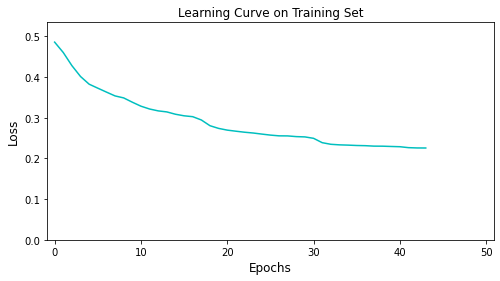

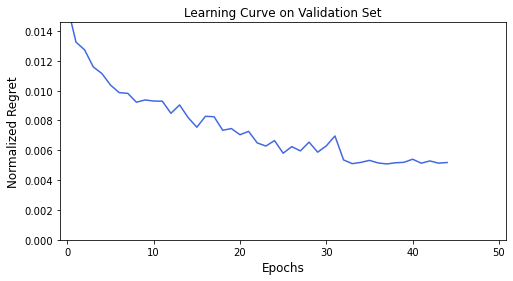

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PSPO/12/TS_loss_log1.csv'

In [53]:
# plot    
plotLearningCurve(loss_log1, regret_log1)
np.savetxt("/content/drive/MyDrive/PSPO/12/TS_loss_log1.csv", np.array(loss_log1))
np.savetxt("/content/drive/MyDrive/PSPO/12/TS_regret_log1.csv", np.array(regret_log1))
# eval 
nnet.load_state_dict(torch.load('/content/drive/MyDrive/PSPO/12/TS.pth'))
print("Test set:")
df1 = evaluate(nnet, optmodel, loader_test)

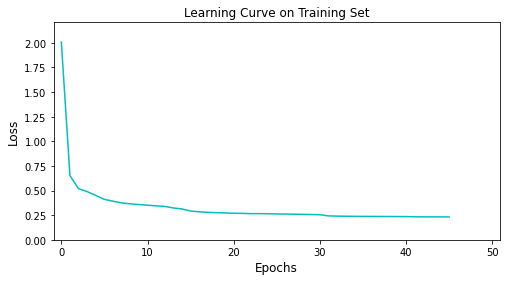

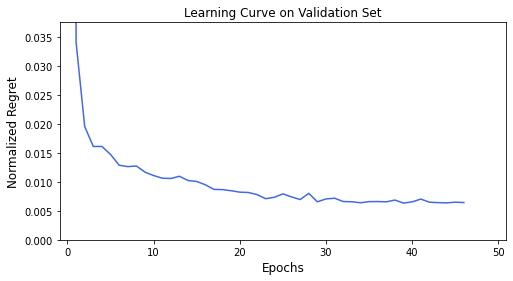

Test set:


100%|██████████| 15/15 [00:32<00:00,  2.20s/it]


Avg Regret: 0.1456
Avg Rel Regret: 0.67%
Path Accuracy: 94.42%
Optimality Ratio: 81.10%


In [ ]:
# plot    
plotLearningCurve(loss_log1, regret_log1)
np.savetxt("/content/drive/MyDrive/PSPO/12/TS_loss_log1.csv", np.array(loss_log1))
np.savetxt("/content/drive/MyDrive/PSPO/12/TS_regret_log1.csv", np.array(regret_log1))
# eval 
nnet.load_state_dict(torch.load('/content/drive/MyDrive/PSPO/12/TS.pth'))
print("Test set:")
df1 = evaluate(nnet, optmodel, loader_test)

In [ ]:
state = {
        'net': nnet.state_dict(),
        'acc': 94.55,
        'epoch': 50,
    }

torch.save(state, '/content/drive/MyDrive/nnet_pyepo_mse_k=30_10000.pth')

In [ ]:
np.savetxt("/content/drive/MyDrive/nnet_pyepo_mse_k=30_10000loss_log1.csv", np.array(loss_log1))
np.savetxt("/content/drive/MyDrive/nnet_pyepo_mse_k=30_10000regret_log1.csv", np.array(regret_log1))

## 6.3 SPO+

In [ ]:
# init net
nnet = partialResNet(k=12)
# cuda
if torch.cuda.is_available():
    nnet = nnet.cuda()
# set optimizer
optimizer = torch.optim.Adam(nnet.parameters(), lr=lr)
# set stopper
#stopper = earlyStopper(patience=7)

In [ ]:
# set loss
spoploss = pyepo.func.SPOPlus(optmodel, processes=1)

In [ ]:
# train
loss_log3, regret_log3 = [], [pyepo.metric.regret(nnet, optmodel, loader_test)]
tbar = tqdm(range(epochs))
for epoch in tbar:
    nnet.train()
    for x, c, w, z in loader_train:
        # cuda
        if torch.cuda.is_available():
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # forward pass
        cp = nnet(x) # predicted cost
        loss = spoploss(cp, c, w, z).mean() # loss
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # log loss
        loss_log3.append(loss.item())
        tbar.set_description("Epoch: {:2}, Loss: {:3.4f}".format(epoch, loss.item()))
    # scheduled learning rate
    if (epoch == int(epochs*0.6)) or (epoch == int(epochs*0.8)):
        for g in optimizer.param_groups:
            g['lr'] /= 10
    if epoch % log_step == 0:
        # log regret
        regret = pyepo.metric.regret(nnet, optmodel, loader_test) # regret on test
        regret_log3.append(regret)
        # early stop
        #regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        #if stopper.stop(regret):
        #    break

## pre-traing+SPO

In [ ]:
# init net
nnet = partialResNet(k=18)
# cuda
if torch.cuda.is_available():
    nnet = nnet.cuda()
#load parameters from mse
nnet.load_state_dict(torch.load('/content/drive/MyDrive/PSPO/18/TS.pth'))
# set optimizer
optimizer = torch.optim.Adam(nnet.parameters(), lr=lr)
# set stopper
early_stopping = EarlyStopping(patience=50,delta=0, verbose=True,path='/content/drive/MyDrive/PSPO/18/PSPO.pth')
# set loss
spoploss = pyepo.func.SPOPlus(optmodel, processes=1)

Num of cores: 1


In [ ]:
# train
#train_loss_list=[]
loss_log3, regret_log3 = [], [pyepo.metric.regret(nnet, optmodel, loader_val)]
tbar = tqdm(range(epochs))
for epoch in tbar:
    nnet.train()
    train_loss=0
    batch_idx=0
    for x, c, w, z in loader_train:
        # cuda
        if torch.cuda.is_available():
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # forward pass
        cp = nnet(x) # predicted cost
        loss = spoploss(cp, c, w, z).mean() # loss
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # log loss
        tbar.set_description("Epoch: {:2}, Loss: {:3.4f}".format(epoch, loss.item()))
        train_loss+=loss.item()
        batch_idx+=1
    loss_log3.append(train_loss/batch_idx)
    
    #train_loss_list.append(train_loss/(batch_idx+1))
    # scheduled learning rate
    if (epoch == int(epochs*0.6)) or (epoch == int(epochs*0.8)):
        for g in optimizer.param_groups:
            g['lr'] /= 10
    if epoch % log_step == 0:
        # log regret
        regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        regret_log3.append(regret)
        # early stop
        #regret = pyepo.metric.regret(nnet, optmodel, loader_val) # regret on val
        early_stopping(regret,nnet)  
        if early_stopping.early_stop:
          print("Early stopping")
          break
    if epoch==24:
      #plotLearningCurve(loss_log3, regret_log3)
      # eval
      print("Test set:")
      df3 = evaluate(nnet, optmodel, loader_test)
    #gc.collect()

KeyboardInterrupt: ignored

In [ ]:
df3 =pd.read_csv('/content/drive/MyDrive/PSPO/18/PSPO_evaluate.csv')

In [ ]:
df3.mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of      Unnamed: 0  Regret  Relative Regret  Accuracy  Optimal
0             0    -0.0        -0.000000  0.981481     True
1             1     0.0         0.000000  0.962963     True
2             2     0.4         0.015385  0.938272    False
3             3     0.0         0.000000  0.981481     True
4             4     0.8         0.017279  0.925926    False
..          ...     ...              ...       ...      ...
995         995     0.4         0.012579  0.987654    False
996         996     0.0         0.000000  1.000000     True
997         997     0.0         0.000000  0.993827     True
998         998     0.0         0.000000  1.000000     True
999         999     0.8         0.019277  0.910494    False

[1000 rows x 5 columns]>

In [ ]:
# plot    
plotLearningCurve(loss_log3, regret_log3)
np.savetxt("/content/drive/MyDrive/PSPO/18/PSPO_loss_log3.csv", np.array(loss_log3))
np.savetxt("/content/drive/MyDrive/PSPO/18/PSPO_regret_log3.csv", np.array(regret_log3))

# eval 
nnet.load_state_dict(torch.load('/content/drive/MyDrive/PSPO/18/PSPO.pth'))
print("Test set:")
df3 = evaluate(nnet, optmodel, loader_test)
df3.to_csv("/content/drive/MyDrive/PSPO/18/PSPO_evaluate.csv")
'''
# plot
plotLearningCurve(loss_log3, regret_log3)
# eval
print("Test set:")
df3 = evaluate(nnet, optmodel, loader_test)'''

In [ ]:
nnet.load_state_dict(torch.load('/content/drive/MyDrive/PSPO/18/PSPO.pth'))
print("Test set:")
df3 = evaluate(nnet, optmodel, loader_test)

Test set:


100%|██████████| 15/15 [01:11<00:00,  4.75s/it]


Avg Regret: 0.1430
Avg Rel Regret: 0.46%
Path Accuracy: 97.73%
Optimality Ratio: 81.50%


In [ ]:
state = {
        'net': nnet.state_dict(),
        'acc': 97.68,
        'epoch': 50,
    }

torch.save(state, '/content/drive/MyDrive/nnet_pyepo_spo50_k=30_10000.pth')

In [ ]:
np.savetxt("/content/drive/MyDrive/nnet_pyepo_pspo_k=30_10000loss_log3.csv", np.array(loss_log3))
np.savetxt("/content/drive/MyDrive/nnet_pyepo_spo_k=30_10000regret_log3.csv", np.array(regret_log3))

In [ ]:
# init net
nnet_spo = partialResNet(k=12)
# cuda
if torch.cuda.is_available():
    nnet_spo = nnet_spo.cuda()
# set optimizer
optimizer = torch.optim.Adam(nnet_spo.parameters(), lr=lr)
# set stopper
#stopper = earlyStopper(patience=7)
# set loss
spoploss = pyepo.func.SPOPlus(optmodel, processes=1)
# train
loss_log3, regret_log3 = [], [pyepo.metric.regret(nnet_spo, optmodel, loader_test)]
tbar = tqdm(range(epochs))
for epoch in tbar:
    nnet_spo.train()
    train_loss=0
    for batch_idx,x, c, w, z in enumerate(loader_train):
        # cuda
        if torch.cuda.is_available():
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # forward pass
        cp = nnet_spo(x) # predicted cost
        loss = spoploss(cp, c, w, z).mean() # loss
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # log loss
        train_loss+=loss.item()
    loss_log3.append(train_loss(batch_idx+1))
    tbar.set_description("Epoch: {:2}, Loss: {:3.4f}".format(epoch, train_loss(batch_idx+1)))
    # scheduled learning rate
    if (epoch == int(epochs*0.6)) or (epoch == int(epochs*0.8)):
        for g in optimizer.param_groups:
            g['lr'] /= 10
    if epoch % log_step == 0:
        # log regret
        regret = pyepo.metric.regret(nnet_spo, optmodel, loader_test) # regret on test
        regret_log3.append(regret)
        # early stop
        #regret = pyepo.metric.regret(nnet_spo, optmodel, loader_test) # regret on val
        #if stopper.stop(regret):
            #break
    if epoch==24:
      plotLearningCurve(loss_log3, regret_log3)
      # eval
      print("Test set:")
      df3 = evaluate(nnet_spo, optmodel, loader_test)

In [ ]:
#!/usr/bin/env python
# coding: utf-8
"""
True regret loss
"""

import numpy as np
import torch

from pyepo import EPO

def regret_w(predmodel, optmodel, dataloader):
    """
    A function to evaluate model performance with normalized true regret

    Args:
        predmodel (nn): a regression neural network for cost prediction
        optmodel (optModel): an PyEPO optimization model
        dataloader (DataLoader): Torch dataloader from optDataSet

    Returns:
        float: true regret loss
    """
    # evaluate
    predmodel.eval()
    loss = 0
    optsum = 0
    # load data
    for data in dataloader:
        x, c, w, z = data
        # cuda
        if next(predmodel.parameters()).is_cuda:
            x, c, w, z = x.cuda(), c.cuda(), w.cuda(), z.cuda()
        # predict
        with torch.no_grad(): # no grad
            cp = predmodel(x).to("cpu").detach().numpy()
        # solve
        for j in range(cp.shape[0]):
            # accumulate loss
            loss += calRegret_w(optmodel, cp[j], c[j].to("cpu").detach().numpy(),
                              z[j].item())
        optsum += abs(z).sum().item()
        #break
    # turn back train mode
    predmodel.train()
    # normalized
    print(loss)
    print(optsum)
    return loss / (optsum + 1e-7)


def calRegret_w(optmodel, pred_cost, true_cost, true_obj):
    """
    A function to calculate normalized true regret for a batch

    Args:
        optmodel (optModel): optimization model
        pred_cost (torch.tensor): predicted costs
        true_cost (torch.tensor): true costs
        true_obj (torch.tensor): true optimal objective values

    Returns:predmodel
        float: true regret losses
    """
    # opt sol for pred cost
    optmodel.setObj(true_cost)
    #sol, _ = optmodel.solve()
    # obj with true cost
    #print(cp)
    _, idx = cp.topk(8)
    cp.fill_(0)
    for idx in enumerate(idx):
      cp[idx] = 1
    #print(cp)
    obj = np.dot(cp.detach().numpy(), true_cost)
    
    # loss
    if optmodel.modelSense == EPO.MINIMIZE:
        loss = obj - true_obj
    if optmodel.modelSense == EPO.MAXIMIZE:
        loss = true_obj - obj
    
    return loss


In [ ]:
import pyepo
import torch
from torch import nn
from torch.utils.data import DataLoader

# model for shortest path
grid = (5,5) # grid size
optmodel = pyepo.model.grb.shortestPathModel(grid)

# generate data
num_data = 1000 # number of data
num_feat = 5 # size of feature
deg = 8 # polynomial degree
noise_width = 0.5 # noise width
x, c = pyepo.data.shortestpath.genData(num_data, num_feat, grid, deg, noise_width, seed=135)

# build dataset
dataset = pyepo.data.dataset.optDataset(optmodel, x, c)

# get data loader
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

Restricted license - for non-production use only - expires 2024-10-28
Optimizing for optDataset...


100%|██████████| 1000/1000 [00:01<00:00, 654.67it/s]


In [ ]:


# build linear model
class LinearRegression(nn.Module):

    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear1 = nn.Linear(5, 1024)
        self.relu=nn.ReLU()
        self.linear2 = nn.Linear(1024, 40)
    def forward(self, x):
        x = self.linear1(x)
        x=self.relu(x)
        x=self.linear2(x)
        return x
# init
predmodel = LinearRegression()
# set optimizer
optimizer = torch.optim.Adam(predmodel.parameters(), lr=1e-3)
# init SPO+ loss
spo = pyepo.func.SPOPlus(optmodel, processes=0)
criterion = nn.CrossEntropyLoss()
# training
num_epochs = 100
for epoch in range(num_epochs):
    trainloss=0
    for data in dataloader:
      x, c, w, z = data
        # forward pass
      cp = predmodel(x)
      #print(cp)
        #loss = spo(cp, c, w, z).mean()
      loss = criterion(cp, w).mean()
        # backward pass
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      trainloss+=loss
    print(trainloss/1000)
      
        
# eval
print((regret_w(predmodel, optmodel, dataloader)))

Num of cores: 0
tensor(23.3951, grad_fn=<DivBackward0>)
tensor(22.3319, grad_fn=<DivBackward0>)
tensor(21.9331, grad_fn=<DivBackward0>)
tensor(21.7339, grad_fn=<DivBackward0>)
tensor(21.5781, grad_fn=<DivBackward0>)
tensor(21.4321, grad_fn=<DivBackward0>)
tensor(21.2809, grad_fn=<DivBackward0>)
tensor(21.2353, grad_fn=<DivBackward0>)
tensor(21.0929, grad_fn=<DivBackward0>)
tensor(21.0182, grad_fn=<DivBackward0>)
tensor(20.9376, grad_fn=<DivBackward0>)
tensor(20.8659, grad_fn=<DivBackward0>)
tensor(20.8272, grad_fn=<DivBackward0>)
tensor(20.7852, grad_fn=<DivBackward0>)
tensor(20.6783, grad_fn=<DivBackward0>)
tensor(20.6777, grad_fn=<DivBackward0>)
tensor(20.6029, grad_fn=<DivBackward0>)
tensor(20.6026, grad_fn=<DivBackward0>)
tensor(20.4730, grad_fn=<DivBackward0>)
tensor(20.4654, grad_fn=<DivBackward0>)
tensor(20.3855, grad_fn=<DivBackward0>)
tensor(20.3852, grad_fn=<DivBackward0>)
tensor(20.3476, grad_fn=<DivBackward0>)
tensor(20.3113, grad_fn=<DivBackward0>)
tensor(20.2550, grad_fn=

KeyboardInterrupt: ignored

In [ ]:
import numpy as np
np.dot(c,w.T)

array([[0.17887975]], dtype=float32)

In [ ]:
import pyepo
import torch
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import random_split

# model for shortest path
grid = (5,5) # grid size
optmodel = pyepo.model.grb.shortestPathModel(grid)

# generate data
num_data = 1100 # number of data
num_feat = 5 # size of feature
deg = 8 # polynomial degree
noise_width = 0.5 # noise width
x, c = pyepo.data.shortestpath.genData(num_data, num_feat, grid, deg, noise_width, seed=135)

# build dataset
dataset = pyepo.data.dataset.optDataset(optmodel, x, c)
torch.manual_seed(0)
train_set,val_set = random_split(dataset,[100,1000])

# get data loader
trainloader = DataLoader(train_set, batch_size=32, shuffle=True)
testloader = DataLoader(val_set, batch_size=256, shuffle=False)

# build linear model
class LinearRegression(nn.Module):

    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(5, 40)

    def forward(self, x):
        out = self.linear(x)
        return out


Optimizing for optDataset...


100%|██████████| 1100/1100 [00:01<00:00, 558.96it/s]


In [ ]:
class LinearRegression_double(nn.Module):

    def __init__(self):
        super(LinearRegression_double, self).__init__()
        self.linear1 = nn.Linear(5, 40)
        #for p in self.parameters():
          #p.requires_grad=False
        #self.linear2 = nn.Linear(40, 40)

    def forward(self, x):
        x = self.linear1(x)
        #out = self.linear2(x)
        return x


In [ ]:
  # init
predmodel = LinearRegression()
  # set optimizer
optimizer = torch.optim.Adam(predmodel.parameters(), lr=1e-3)
  # init L1Loss loss
#criterion = nn.L1Loss()
spo = pyepo.func.SPOPlus(optmodel, processes=0)

train_loss_list = []
test_loss_list = []
train_regret_list = []
test_regret_list = []
  # training
num_epochs = 100

for epoch in range(num_epochs):
    train_loss = 0
    for batch_idx,data in enumerate(trainloader):
        x, c, w, z = data
        # forward pass
        cp = predmodel(x)
        #loss = criterion(cp, c).mean()
        loss = spo(cp, c, w, z).mean()
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    train_loss_list.append(train_loss/(batch_idx+1))
    train_regret=pyepo.metric.regret(predmodel, optmodel, trainloader)
    train_regret_list.append(train_regret)


    '''test_loss = 0
    with torch.inference_mode():
      for batch_idx,data in enumerate(testloader):
          x, c, w, z = data
          # forward pass
          cp = predmodel(x)
          #loss = criterion(cp, c).mean()
          loss = spo(cp, c, w, z).mean()
          test_loss += loss.item()
      
    test_loss_list.append(test_loss/(batch_idx+1))
    test_regret=pyepo.metric.regret(predmodel, optmodel, testloader)
    test_regret_list.append(test_regret)
    print(("Epoch : %3d, training regret : %2.4f," + \
        "test regret : %2.4f") % (epoch, train_regret, test_regret))'''

Num of cores: 0


In [ ]:
# eval
print("Regret on Training Set: {:.4f}".format(pyepo.metric.regret(predmodel, optmodel, trainloader)))
print("Regret on Test Set: {:.4f}".format(pyepo.metric.regret(predmodel, optmodel, testloader)))

Regret on Training Set: 0.1357
Regret on Test Set: 0.2336


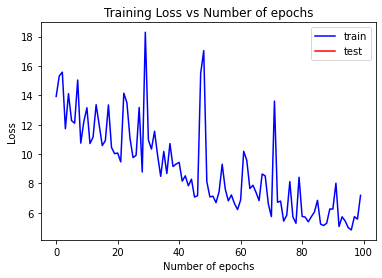

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_loss_list)), train_loss_list, 'b')
plt.plot(range(len(test_loss_list)), test_loss_list, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Number of epochs")
plt.legend(['train','test'])
plt.show()

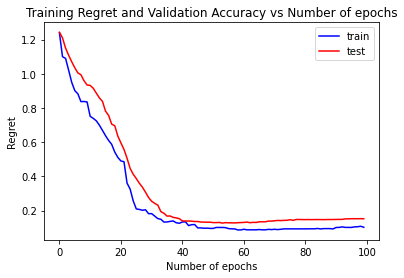

In [ ]:
plt.plot(range(len(train_regret_list)), train_regret_list, 'b')
plt.plot(range(len(test_regret_list)), test_regret_list, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Regret")
plt.title("Training Regret and Validation Accuracy vs Number of epochs")
plt.legend(['train','test'])
plt.show()

In [ ]:
print(predmodel.state_dict().keys())                                # 输出模型参数名称
 
# 保存模型参数到路径"./data/model_parameter.pkl"
torch.save(predmodel.state_dict(), "./model_parameter.pkl")                                         # 进行使用

odict_keys(['linear.weight', 'linear.bias'])


In [ ]:
predmodel.linear.weight

Parameter containing:
tensor([[ 4.0695e-01,  7.0315e-03, -1.2506e-02,  4.0442e-01,  3.2143e-01],
        [-4.8706e-02,  5.5737e-01,  3.6789e-01, -1.3693e-02,  4.2348e-01],
        [ 1.9326e-03,  1.7070e-02, -6.7492e-03,  1.1635e-02, -1.7618e-02],
        [ 2.9658e-01,  5.0517e-01,  3.5932e-01, -3.7297e-02,  3.1881e-01],
        [-1.8502e-02,  7.2575e-03, -1.4016e-03,  3.4380e-01,  3.3901e-01],
        [ 3.1541e-01, -1.6286e-01,  4.8901e-01,  4.5300e-01,  3.8357e-01],
        [ 3.8810e-01, -5.6692e-03,  4.3967e-01,  5.2598e-01,  4.1919e-02],
        [-3.1852e-02,  4.5908e-01,  3.8931e-01,  2.9822e-01,  3.5631e-01],
        [ 2.9350e-01,  4.3852e-01,  4.8136e-02, -1.6624e-02,  3.0807e-01],
        [ 1.5330e-02, -4.0407e-02,  3.9116e-01,  1.2152e-02,  3.8498e-01],
        [ 3.8264e-01, -1.1429e-01,  4.2871e-01,  4.8143e-01,  3.6056e-01],
        [ 3.8275e-01,  4.6353e-03, -1.4864e-02,  4.1787e-01,  1.8696e-02],
        [ 2.6415e-01,  5.0877e-01,  3.8754e-01,  3.1680e-01,  2.6135e-01],
   

In [ ]:
regret = []
for i in range (10):
  # init
  predmodel_spo = LinearRegression_double()
  predmodel_spo.linear1.weight=predmodel.linear.weight
  predmodel_spo.linear1.weight.requires_grad=False
  predmodel_spo.linear1.bias=predmodel.linear.bias
  predmodel_spo.linear1.bias.requires_grad=False
  # set optimizer
  optimizer = torch.optim.Adam(predmodel_spo.parameters(), lr=1e-2)
  # init SPO+ loss
  spo = pyepo.func.SPOPlus(optmodel, processes=0)


  train_loss_list = []
  test_loss_list = []
  train_regret_list = []
  test_regret_list = []
  # training
  num_epochs = 30

  for epoch in range(num_epochs):
      train_loss = 0
      for batch_idx,data in enumerate(trainloader):
          x, c, w, z = data
          # forward pass
          cp = predmodel_spo(x)
          loss = spo(cp, c, w, z).mean()
          # backward pass
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          train_loss += loss.item()
      train_loss_list.append(train_loss/(batch_idx+1))
      train_regret=pyepo.metric.regret(predmodel_spo, optmodel, trainloader)
      train_regret_list.append(train_regret)

  '''    test_loss = 0
      with torch.inference_mode():
        for batch_idx,data in enumerate(testloader):
            x, c, w, z = data
            # forward pass
            cp = predmodel_spo(x)
            loss = spo(cp, c, w, z).mean()

            test_loss += loss.item()
      
      test_loss_list.append(test_loss/(batch_idx+1))
      test_regret=pyepo.metric.regret(predmodel_spo, optmodel, testloader)
      test_regret_list.append(test_regret)
      print(("Epoch : %3d, training regret : %2.4f," + \
        "test regret : %2.4f") % (epoch, train_regret, test_regret))'''
  regret.append(pyepo.metric.regret(predmodel_spo, optmodel, testloader))

Num of cores: 0
Num of cores: 0
Num of cores: 0
Num of cores: 0
Num of cores: 0
Num of cores: 0
Num of cores: 0
Num of cores: 0
Num of cores: 0
Num of cores: 0


In [ ]:
# init 
predmodel_spo = LinearRegression_double()
predmodel_spo.linear1.weight=predmodel.linear.weight
predmodel_spo.linear1.weight.requires_grad=False
predmodel_spo.linear1.bias=predmodel.linear.bias
predmodel_spo.linear1.bias.requires_grad=False
  # set optimizer
optimizer = torch.optim.Adam(predmodel_spo.parameters(), lr=1e-2)
  # init SPO+ loss
spo = pyepo.func.SPOPlus(optmodel, processes=0)


train_loss_list = []
test_loss_list = []
train_regret_list = []
test_regret_list = []
  # training
num_epochs = 30

for epoch in range(num_epochs):
    train_loss = 0
    for batch_idx,data in enumerate(trainloader):
        x, c, w, z = data
          # forward pass
        cp = predmodel_spo(x)
        loss = spo(cp, c, w, z).mean()
          # backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
    train_loss_list.append(train_loss/(batch_idx+1))
    train_regret=pyepo.metric.regret(predmodel_spo, optmodel, trainloader)
    train_regret_list.append(train_regret)

Num of cores: 0


In [ ]:
data=[]
data=regret

In [ ]:
data2=[]
data2=regret

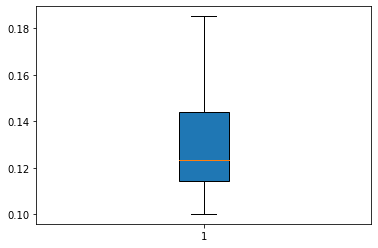

In [ ]:
import matplotlib.pyplot as plt

#regret1=regret

fig=plt.figure()
 
# patch_artist=True填充箱体颜色

plt.boxplot(data2,patch_artist=True) 
 
plt.show()

In [ ]:
# eval
print("Regret on Training Set: {:.4f}".format(pyepo.metric.regret(predmodel_spo, optmodel, trainloader)))
print("Regret on Test Set: {:.4f}".format(pyepo.metric.regret(predmodel_spo, optmodel, testloader)))

Regret on Training Set: 0.0593
Regret on Test Set: 0.1458


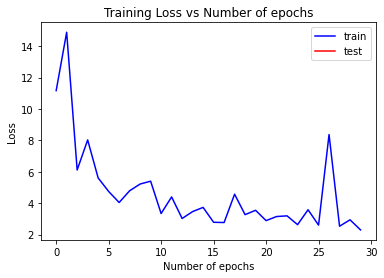

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(len(train_loss_list)), train_loss_list, 'b')
plt.plot(range(len(test_loss_list)), test_loss_list, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Number of epochs")
plt.legend(['train','test'])
plt.show()

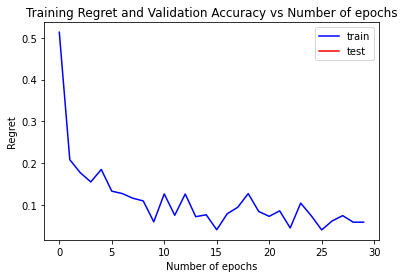

In [ ]:
plt.plot(range(len(train_regret_list)), train_regret_list, 'b')
plt.plot(range(len(test_regret_list)), test_regret_list, 'r')
plt.xlabel("Number of epochs")
plt.ylabel("Regret")
plt.title("Training Regret and Validation Accuracy vs Number of epochs")
plt.legend(['train','test'])
plt.show()